In [1]:
import pandas
data = pandas.read_csv('wine.data',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = data.copy()
y = data[0].copy()
del X[0]
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

Text(0.5, 0, 'k')

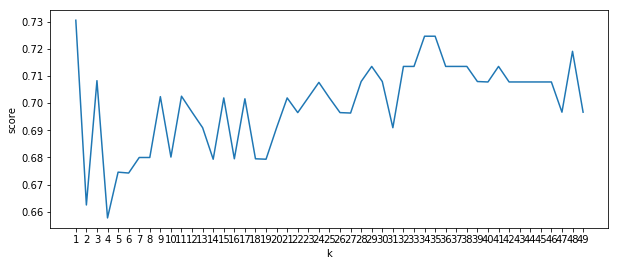

In [12]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

mean_scores = []

for k in range(1,50):
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X, y, cv=kf)
    mean_scores.append(scores.mean())
    
plt.figure(figsize=(10,4))
plt.plot(np.linspace(1, 49, 49), mean_scores)
plt.xticks(np.linspace(1, 49, 49))
plt.ylabel("score")
plt.xlabel("k")
# optimal k = 1, score = 0.73

In [14]:
def print_max_iter(arr):
    m = max(arr)
    
    for i in range(0,len(arr)):
        if arr[i] == m:
            print('k = ', i+1)

print_max_iter(mean_scores)

k =  1


/home/konstantin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'k')

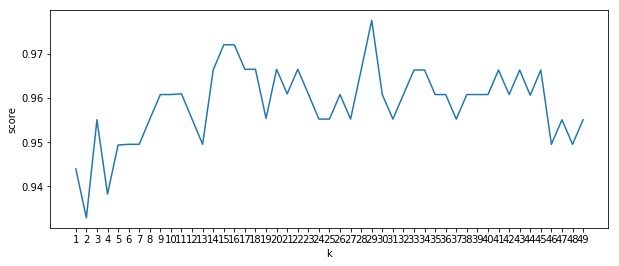

In [15]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)

mean_scores = []

for k in range(1,50):
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X_scaled, y, cv=kf)
    mean_scores.append(scores.mean())
    
plt.figure(figsize=(10,4))
plt.plot(np.linspace(1, 49, 49), mean_scores)
plt.xticks(np.linspace(1, 49, 49))
plt.ylabel("score")
plt.xlabel("k")
# optimal k = 29, score = 0.98

In [16]:
print_max_iter(mean_scores)

k =  29
